# Technitrade

**LSTM Model Class Test**

In [1]:
import os

# Technials Analysis Library
os.chdir("../technicals")
import technicals

# Market Data Connection
os.chdir("../marketdata")
import alpaca

# Machine Learning Model
os.chdir("../ml")
import lstm_model

---

## Get data

### *Get market data*

In [2]:
# Set market data date range 
from datetime import date, datetime, timedelta

end_date  = datetime.now()
start_date  = (end_date - timedelta(days=1000))

start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')

print(f"Start date : {start_date}")
print(f"End date : {end_date}")

Start date : 2018-10-17
End date : 2021-07-13


In [3]:
# instantiate test ticker : Coca-Cola
test_tickers = ["KO"]

# get market data using Alpaca API
ohlcv_df = alpaca.ohlcv(test_tickers, start_date=start_date, end_date=end_date)

### *Get technical indicator data*

In [3]:
# instantiate technical indicator class
tech_ind = technicals.TechnicalAnalysis(ohlcv_df)

# get all technical indicators
df = tech_ind.get_all_technicals(test_tickers[0])

# preview data
df.head()

,open,high,low,close,volume,rsi,williams,mfi,stoch_k,macd,...,ma_50,ma_200,ema_7,ema_14,ema_21,highlow,closeopen,bb_high,bb_low,pvt
time,,,,,,,,,,,,,,,,,,,,,
2018-10-17 00:00:00-04:00,45.41,45.990,45.360,45.855,8034046,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,45.855000,45.855000,45.855000,0.630,0.445,0.0,0.0,0.000000
2018-10-18 00:00:00-04:00,45.90,46.080,45.455,45.640,9403895,0.000000,0.0,0.0,0.0,-0.004824,...,0.0,0.0,45.732143,45.739821,45.742381,0.625,-0.260,0.0,0.0,0.000000
2018-10-19 00:00:00-04:00,45.82,46.490,45.820,46.320,11087680,18.428184,0.0,0.0,0.0,0.014940,...,0.0,0.0,45.986351,45.961452,45.953535,0.670,0.500,0.0,0.0,209289.659307
2018-10-22 00:00:00-04:00,46.37,46.455,45.810,45.960,8837220,16.684192,0.0,0.0,0.0,0.010566,...,0.0,0.0,45.976714,45.961008,45.955389,0.645,-0.410,0.0,0.0,-233880.743235
2018-10-23 00:00:00-04:00,45.62,46.455,45.450,46.360,14166742,25.120382,0.0,0.0,0.0,0.023883,...,0.0,0.0,46.102350,46.065104,46.052421,1.005,0.740,0.0,0.0,191979.332017


---

## Build and train LSTM Model

In [4]:
# instantiate MachineLearningModel class
model = lstm_model.MachineLearningModel(df)

In [5]:
# build and train model
hist = model.build_model(summary=1, verbose=0)

C:\Users\illya\anaconda3\envs\cu_proj_2\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 90)           38880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 30)           14520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 14)                434       
Total params: 61,154
Trainable params: 61,154
Non-trainable params: 0
_________________________________________________________________


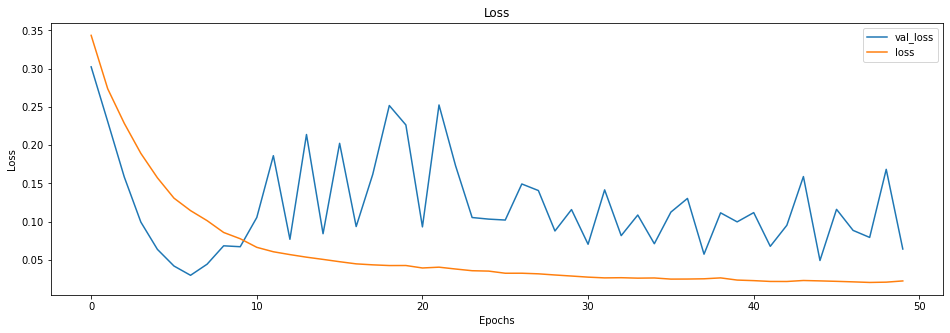

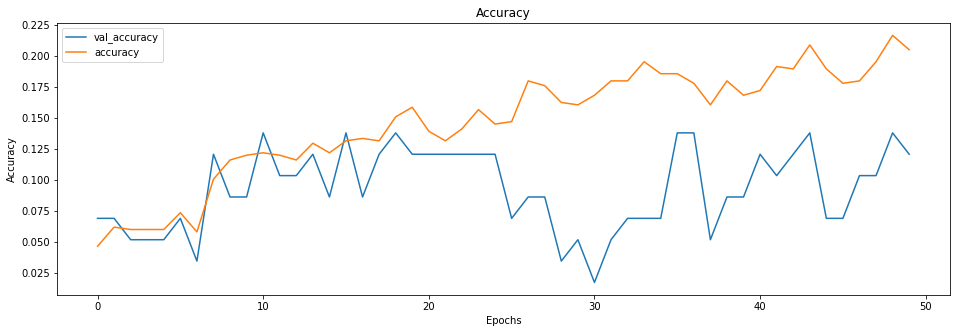

In [6]:
# visualize validation loss, validation, validation accuracy, accuracy
model.visualize_training_results(hist=hist)

In [7]:
# validate model - get predicted stock proces
model.validate()

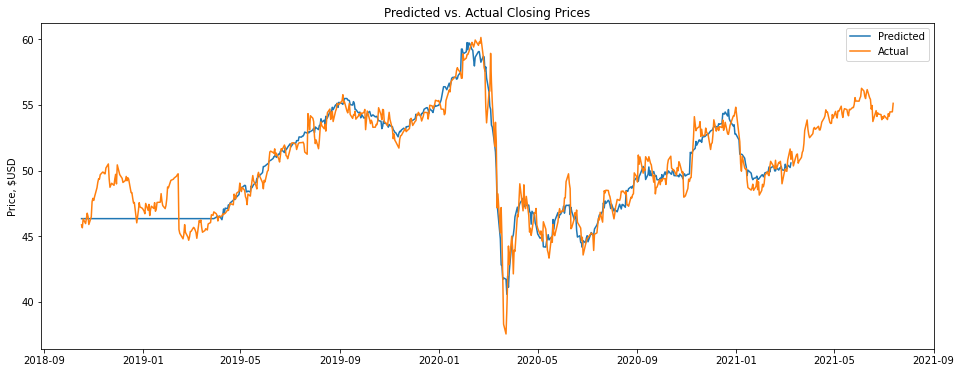

In [8]:
# visualize predicted stock price and actual stock price
model.visualize_training_price()

In [9]:
# get and print Root Mean Square Error
print(f"RMS Error : {model.rmse_value}")

RMS Error : 1.2108341370466973


In [15]:
# save model
model.save_model('proj2_test_model')

---

## Forecast stock price

### *Get market data*

In [29]:
# Set market data date range 
from datetime import date, datetime, timedelta

forecast_end_date  = datetime.now()
forecast_start_date  = (forecast_end_date - timedelta(days=200))

forecast_start_date = forecast_start_date.strftime('%Y-%m-%d')
forecast_end_date = forecast_end_date.strftime('%Y-%m-%d')

print(f"Forecast start date : {forecast_start_date}")
print(f"Forecast end date : {forecast_end_date}")

Forecast start date : 2020-12-25
Forecast end date : 2021-07-13


In [30]:
# Load the dataset
forecast_ohlcv_df = alpaca.ohlcv(test_tickers, 
                                 start_date=forecast_start_date, 
                                 end_date=forecast_end_date)

### *Calculate technical analysis data*

In [30]:
forecast_tech_ind = technicals.TechnicalAnalysis(forecast_ohlcv_df)
forecast_df = forecast_tech_ind.get_all_technicals(test_tickers[0])
forecast_df.head()

,open,high,low,close,volume,rsi,williams,mfi,stoch_k,macd,...,ma_50,ma_200,ema_7,ema_14,ema_21,highlow,closeopen,bb_high,bb_low,pvt
time,,,,,,,,,,,,,,,,,,,,,
2020-12-28 00:00:00-05:00,53.85,54.435,53.73,54.15,6939826,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,54.150000,54.150000,54.150000,0.705,0.30,0.0,0.0,0.000000
2020-12-29 00:00:00-05:00,54.45,54.490,54.02,54.14,6788060,0.000000,0.0,0.0,0.0,-0.000224,...,0.0,0.0,54.144286,54.144643,54.144762,0.470,-0.31,0.0,0.0,0.000000
2020-12-30 00:00:00-05:00,54.05,54.630,54.03,54.45,6576305,68.888889,0.0,0.0,0.0,0.009327,...,0.0,0.0,54.276486,54.261290,54.256344,0.600,0.40,0.0,0.0,38908.803368
2020-12-31 00:00:00-05:00,54.45,54.930,54.27,54.82,6204398,83.459916,0.0,0.0,0.0,0.026802,...,0.0,0.0,54.475257,54.432215,54.417996,0.660,0.37,0.0,0.0,4505.042909
2021-01-04 00:00:00-05:00,54.27,54.630,52.03,52.76,22202518,21.998729,0.0,0.0,0.0,-0.046240,...,0.0,0.0,53.913022,53.995937,54.020382,2.600,-1.51,0.0,0.0,-876475.987663


### *Predict stock price based on previously trained model*

In [63]:
# instantiate ForecastPrice class
forecast_model = lstm_model.ForecastPrice(forecast_df)

In [64]:
# load model
forecast_model.load_model('proj2_test_model.h5')

In [65]:
# get model summary
forecast_model.get_model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 90)           38880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 30)           14520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 14)                434       
Total params: 61,154
Trainable params: 61,154
Non-trainable params: 0
_________________________________________________________________


In [66]:
preds = forecast_model.forecast()

Dataframe un-used columns alread dropped


In [67]:
preds

,close
2021-07-14 00:00:00-04:00,55.641804
2021-07-15 00:00:00-04:00,55.504436
2021-07-16 00:00:00-04:00,55.573204
2021-07-19 00:00:00-04:00,55.666351
2021-07-20 00:00:00-04:00,55.739201
2021-07-21 00:00:00-04:00,55.998184
2021-07-22 00:00:00-04:00,55.918385
2021-07-23 00:00:00-04:00,55.949585
2021-07-26 00:00:00-04:00,55.863155
2021-07-27 00:00:00-04:00,55.779373
